In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("retail_sales_dataset.csv")

In [4]:
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.describe(include='all')

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


In [6]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [7]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [8]:
df.count()

Transaction ID      1000
Date                1000
Customer ID         1000
Gender              1000
Age                 1000
Product Category    1000
Quantity            1000
Price per Unit      1000
Total Amount        1000
dtype: int64

In [9]:
df.shape


(1000, 9)

In [10]:
df["Gender"].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

In [11]:
df["Product Category"].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [12]:
df["Age"].value_counts()

Age
43    31
64    31
57    30
51    30
34    28
54    28
22    27
62    27
42    26
47    26
46    25
23    24
40    24
50    23
27    23
52    22
60    22
30    22
26    22
31    22
35    22
28    21
41    21
18    21
55    21
20    21
19    21
21    20
25    20
49    19
56    19
32    19
38    19
61    18
39    18
48    18
63    17
45    17
59    17
53    17
29    16
37    16
36    15
44    15
24    15
58    14
33    10
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

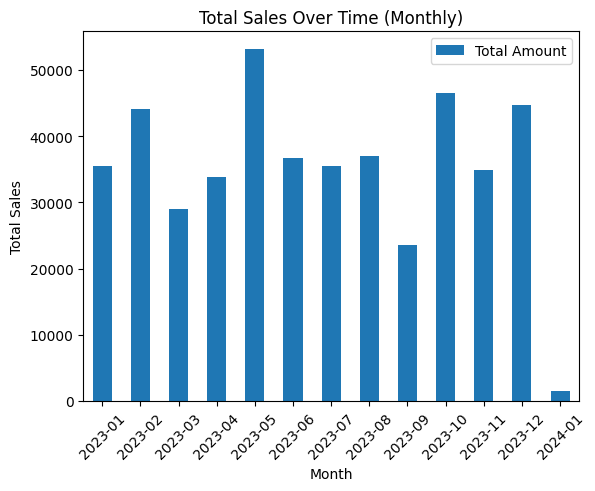

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df['Date']=pd.to_datetime(df['Date'])

# Calculate total sales over time
monthly_sales = df.groupby(df['Date'].dt.to_period("M")).agg({'Total Amount':'sum'})

# Plotting
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

<Figure size 800x600 with 0 Axes>

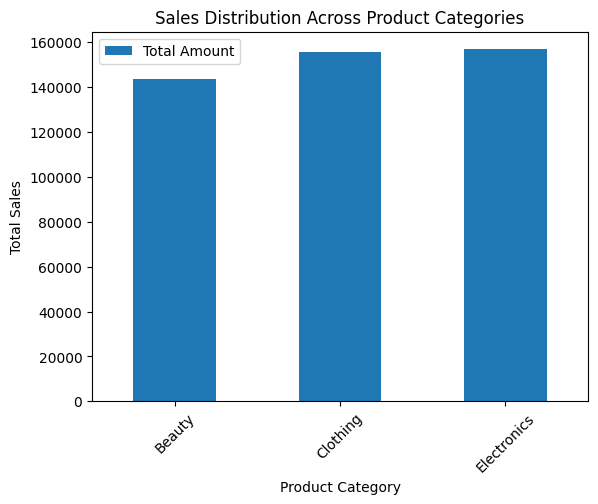

In [15]:
sales_by_category = df.groupby('Product Category').agg({'Total Amount':'sum'})

# Plotting
plt.figure(figsize=(8, 6))
sales_by_category.plot(kind='bar')
plt.title('Sales Distribution Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

<class 'pandas.core.series.Series'>


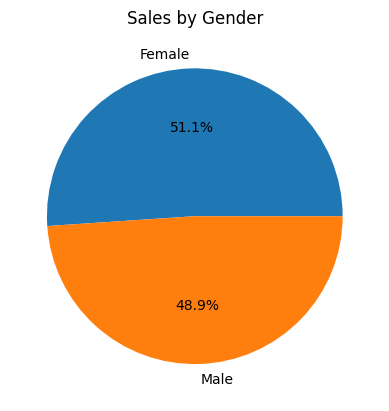

In [16]:
sales_by_gender = df.groupby('Gender')['Total Amount'].sum()

# Make sure 'sales_by_gender' is a pandas Series
print(type(sales_by_gender))  # This should output: <class 'pandas.core.series.Series'>

# Now plot the pie chart directly from the Series
sales_by_gender.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Gender')
plt.ylabel('')  # This hides the y-axis label, which is not needed for pie charts
plt.show()

<Figure size 1000x600 with 0 Axes>

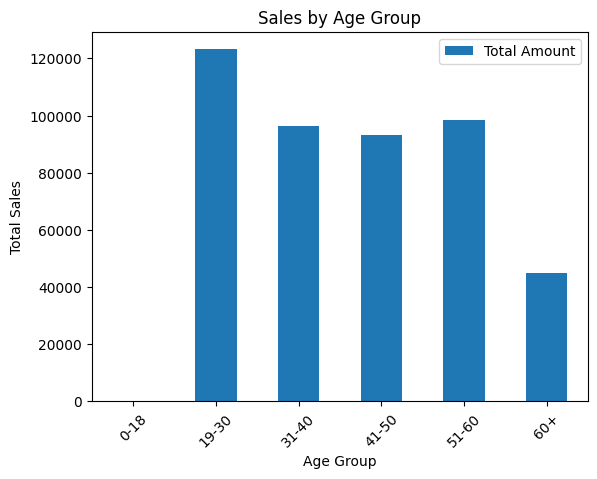

In [17]:
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

sales_by_age_group = df.groupby('Age Group').agg({'Total Amount':'sum'})

# Plotting
plt.figure(figsize=(10, 6))
sales_by_age_group.plot(kind='bar')
plt.title('Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [19]:
total_revenue_by_category=df.groupby('Product Category')['Total Amount'].sum()
total_revenue_by_category

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

In [20]:
average_revenue_by_category=df.groupby('Product Category')['Total Amount'].mean()
average_revenue_by_category

Product Category
Beauty         467.475570
Clothing       443.247863
Electronics    458.786550
Name: Total Amount, dtype: float64

In [21]:
quantity_sold_by_category=df.groupby('Product Category')['Quantity'].sum()
quantity_sold_by_category

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64